In [24]:
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt

In [25]:
def hw3_4e(sampleNum, D, z, x):
    trueModel = np.array([1, 1])
    y = x * trueModel[0] + trueModel[1] + z
    y_star = x * trueModel[0] + trueModel[1]
    fMat = np.ones(sampleNum)
    for i in range(1, D + 1):
        fMat = np.append(fMat, np.power(x,i))
    fMat.shape = (D + 1, sampleNum)
    fMat = np.transpose(fMat)
    lpara = np.dot(fMat.T, fMat)
    rpara = np.dot(fMat.T, y)
    para = np.linalg.solve(lpara,rpara)
    error = 1/sampleNum*np.linalg.norm(np.dot(fMat, para)-y_star,2)**2
    return error

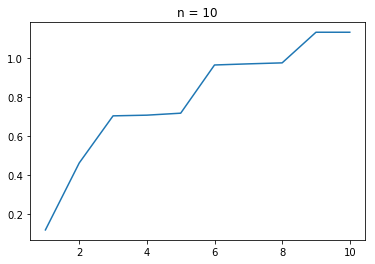

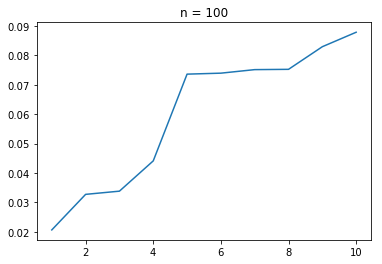

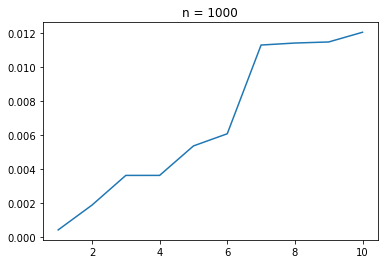

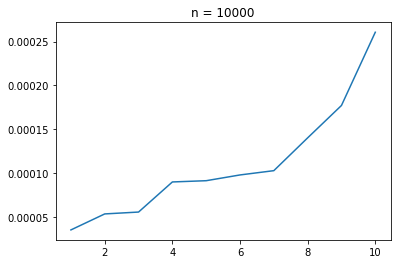

In [37]:
sampleNuml = list([10, 100, 1000, 10000])
for sampleNum in sampleNuml:
    D = range(1,11)
    z = np.random.normal(0,1,sampleNum)
    x = np.random.uniform(-1,1,sampleNum)
    error = np.ones(len(D))
    for i in D:
        hw3_4e(sampleNum,i,z,x)
        error[i-1] = hw3_4e(sampleNum,i,z,x)
    D = np.asarray(D)
    plt.plot(D, error)
    plt.title('n = {}'.format(sampleNum))
    plt.show()